In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oranjemund
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | montecristi
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | korla
Processing Record 10 of Set 1 | gidam
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | morondava
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | cachoeira do sul
Processing Record 17 of Set 1 | berekum
Processing Record 18 of Set 1 | kristinehamn
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | puri
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 

Processing Record 42 of Set 4 | cordoba
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | cintalapa
Processing Record 46 of Set 4 | innisfail
Processing Record 47 of Set 4 | bloomington
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | shakawe
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | vestnes
Processing Record 2 of Set 5 | burnie
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | hobyo
Processing Record 5 of Set 5 | portlethen
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | bellegarde-sur-valserine
Processing Record 9 of Set 5 | vostok
Processing Record 10 of Set 5 | sisimiut
Processing Record 11 of Set 5 | jabiru
City not found. Skipping...
Processing Record 12 of Set 5 | sangar
Processing Record 13 of Set 5 | gondanglegi
Processing Record 14 of Set 5 | dudinka
Processing Record 1

Processing Record 26 of Set 8 | saint anthony
Processing Record 27 of Set 8 | vanimo
Processing Record 28 of Set 8 | khasan
Processing Record 29 of Set 8 | seymour
Processing Record 30 of Set 8 | kudahuvadhoo
Processing Record 31 of Set 8 | charleston
Processing Record 32 of Set 8 | hofn
Processing Record 33 of Set 8 | adrar
Processing Record 34 of Set 8 | iwanai
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | mazyr
Processing Record 37 of Set 8 | kodinsk
Processing Record 38 of Set 8 | gornopravdinsk
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | samdari
Processing Record 42 of Set 8 | hun
Processing Record 43 of Set 8 | kandrian
Processing Record 44 of Set 8 | khorixas
Processing Record 45 of Set 8 | beruwala
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | samarinda
Processing Record 48 of Set 8 | bermejo
Processing Record 49 of Set 8 | bath
Processing Record 50 of Se

Processing Record 19 of Set 12 | boueni
Processing Record 20 of Set 12 | zarate
Processing Record 21 of Set 12 | togur
Processing Record 22 of Set 12 | lexington
Processing Record 23 of Set 12 | coquimbo
Processing Record 24 of Set 12 | kiama
Processing Record 25 of Set 12 | umm kaddadah
Processing Record 26 of Set 12 | port macquarie
Processing Record 27 of Set 12 | bumba
Processing Record 28 of Set 12 | mamlyutka
Processing Record 29 of Set 12 | lucapa
Processing Record 30 of Set 12 | camopi
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | margate
Processing Record 33 of Set 12 | bitung
Processing Record 34 of Set 12 | henties bay
Processing Record 35 of Set 12 | muskogee
Processing Record 36 of Set 12 | tommot
Processing Record 37 of Set 12 | beyneu
Processing Record 38 of Set 12 | nyurba
Processing Record 39 of Set 12 | talaya
Processing Record 40 of Set 12 | muravlenko
Processing Record 41 of Set 12 | asyut
Processing Record 42 of Set 12 | numaligarh
Proc

In [6]:
len(city_data)

566

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oranjemund,-28.5500,16.4333,63.73,41,0,5.99,NA,2022-07-24 19:18:22
1,Bredasdorp,-34.5322,20.0403,49.24,86,0,7.34,ZA,2022-07-24 19:13:52
2,Rikitea,-23.1203,-134.9692,75.00,80,24,15.14,PF,2022-07-24 19:17:43
3,Sitka,57.0531,-135.3300,57.09,88,100,8.05,US,2022-07-24 19:18:23
4,Montecristi,-1.0500,-80.6667,76.82,69,75,8.05,EC,2022-07-24 19:18:24
...,...,...,...,...,...,...,...,...,...
561,Plettenberg Bay,-34.0527,23.3716,55.02,74,68,3.18,ZA,2022-07-24 19:33:41
562,Kaifeng,34.7911,114.3483,73.87,83,0,7.43,CN,2022-07-24 19:33:42
563,Port Moresby,-9.4431,147.1797,76.42,94,40,16.11,PG,2022-07-24 19:31:31
564,Mbandaka,0.0487,18.2603,73.94,82,100,2.91,CD,2022-07-24 19:33:42


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [9]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oranjemund,NA,2022-07-24 19:18:22,-28.5500,16.4333,63.73,41,0,5.99
1,Bredasdorp,ZA,2022-07-24 19:13:52,-34.5322,20.0403,49.24,86,0,7.34
2,Rikitea,PF,2022-07-24 19:17:43,-23.1203,-134.9692,75.00,80,24,15.14
3,Sitka,US,2022-07-24 19:18:23,57.0531,-135.3300,57.09,88,100,8.05
4,Montecristi,EC,2022-07-24 19:18:24,-1.0500,-80.6667,76.82,69,75,8.05
...,...,...,...,...,...,...,...,...,...
561,Plettenberg Bay,ZA,2022-07-24 19:33:41,-34.0527,23.3716,55.02,74,68,3.18
562,Kaifeng,CN,2022-07-24 19:33:42,34.7911,114.3483,73.87,83,0,7.43
563,Port Moresby,PG,2022-07-24 19:31:31,-9.4431,147.1797,76.42,94,40,16.11
564,Mbandaka,CD,2022-07-24 19:33:42,0.0487,18.2603,73.94,82,100,2.91


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

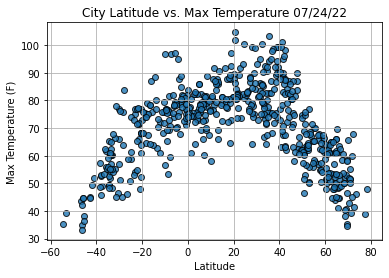

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

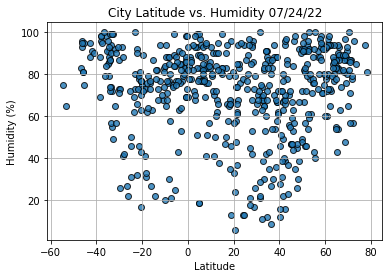

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

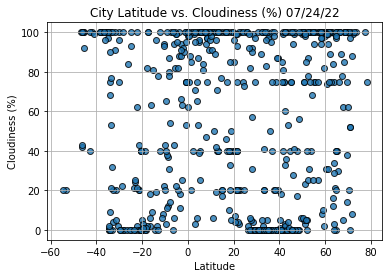

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

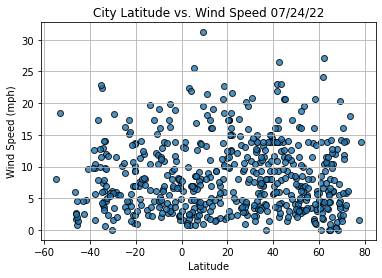

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

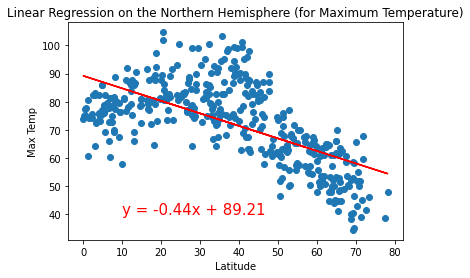

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

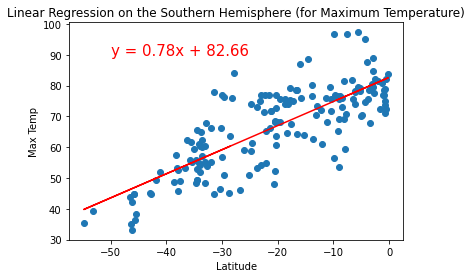

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

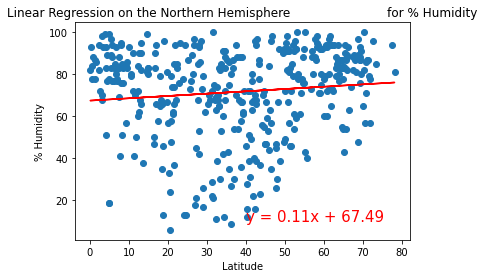

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

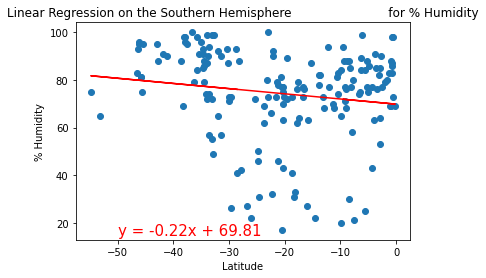

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

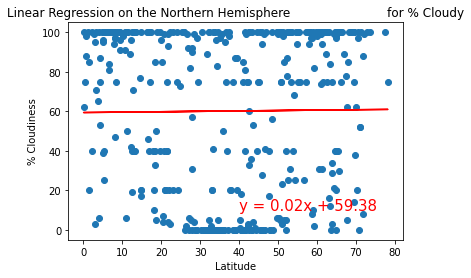

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

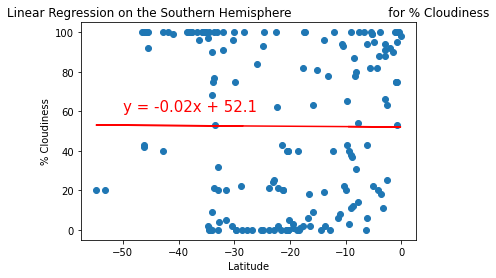

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

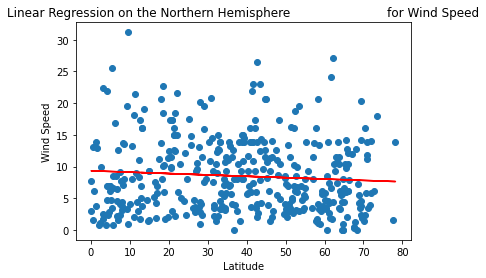

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

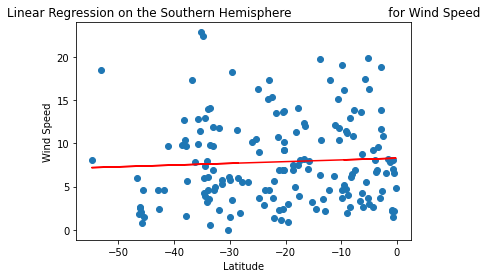

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))